Consider the Bangalore House Price Data. Perform following operations. 
a) Find and replace null values in the data using appropriate technique. 
b) Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2 
c) Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of 
the range to be taken. 
d) Calculate and add one more column as ‘Price_Per_Sqft’ 
e) Remove the outliers from Price_Per_Sqft and BHK Size column if any. 
f) Apply the Linear Regression model to the data and display the training and testing performance measures as Mean 
Squared Error and Accuracy 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Banglore Housing Prices.csv")
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [3]:
df.shape

(13320, 5)

## Handling NULL

In [4]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [6]:
df["size"].isnull().sum()

16

In [7]:
df['size'] = np.where(df['size'].isnull(),df['size'].mode(),df['size'])

In [8]:
df['size'].isnull().sum()

0

In [9]:
df['bath'].isnull().sum()

73

In [10]:
df = df[df['bath'].isnull() == False]

In [11]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
df.isnull().sum()

location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df.dropna(how='any',inplace=True)

In [14]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df.shape

(13246, 5)

## b) Transform size column

In [16]:
df['size'].dtype

dtype('O')

In [17]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df['size'] = df['size'].apply(lambda x: x.split(" ")[0]).astype(int)

In [19]:
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [20]:
df['size'].dtype

dtype('int32')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  int32  
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), int32(1), object(2)
memory usage: 569.2+ KB


## c) Transform total_sqft

In [22]:
df['total_sqft'][:50]

0            1056
1            2600
2            1440
3            1521
4            1200
5            1170
6            2732
7            3300
8            1310
9            1020
10           1800
11           2785
12           1000
13           1100
14           2250
15           1175
16           1180
17           1540
18           2770
19           1100
20            600
21           1755
22           2800
23           1767
24            510
25           1250
26            660
27           1610
28           1151
29           1025
30    2100 - 2850
31           1075
32           1760
33           1693
34           1925
35            700
36           1070
37           1724
38           1290
39           1143
40           1296
41           1254
42            600
43            660
44        1330.74
45            600
46            970
47           1459
48            800
49            869
Name: total_sqft, dtype: object

In [23]:
take_mean = lambda feat :  str((float(feat.split('-')[0].strip()) + float(feat.split('-')[1].strip()))/2) if '-' in feat else feat

In [24]:
df['total_sqft'] = df['total_sqft'].apply(take_mean)

In [25]:
df[df['total_sqft'].str.contains('M') == True]

,location,size,total_sqft,bath,price
410,Kengeri,1,34.46Sq. Meter,1.0,18.50
775,Basavanagara,1,1000Sq. Meter,2.0,93.00
1400,Chamrajpet,9,716Sq. Meter,9.0,296.00
1712,Singena Agrahara,3,1500Sq. Meter,3.0,95.00
1743,Hosa Road,3,142.61Sq. Meter,3.0,115.00
3228,Dodda Banaswadi,5,3040Sq. Meter,5.0,140.00
4113,BTM Layout,3,167Sq. Meter,3.0,10.00
5631,Thanisandra,3,204Sq. Meter,4.0,185.00
5976,1st Phase JP Nagar,1,78.03Sq. Meter,1.0,63.00
6303,JP Nagar,3,84.53Sq. Meter,3.0,69.34


In [26]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: str(np.round(float(x.split('S')[0].strip())*10.7639,2)) if 'Meter' in x else x)

In [27]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: str(np.round(float(x.split('S')[0].strip())*9,2)) if 'Yards' in x else x)

In [28]:
df['total_sqft'] = df['total_sqft'].apply(lambda x : str(np.round(float(x.split('A')[0].strip())*43560,2  )) if 'Acres' in x else x)

In [29]:
df['total_sqft'] = df['total_sqft'].apply(lambda x : str(np.round(float(x.split('G')[0].strip())*2400,2)) if 'Grounds' in x else x  )

In [30]:
df['total_sqft'] = df['total_sqft'].apply(lambda x : str(np.round(float(x.split('G')[0].strip())*2400,2)) if 'Guntha' in x else x  )

In [31]:
df['total_sqft'] = df['total_sqft'].apply(lambda x : str(np.round(float(x.split('C')[0].strip())*435.6,2)) if 'Cents' in x else x)

In [32]:
df['total_sqft'] = df['total_sqft'].apply(lambda x : str(np.round(float(x.split('P')[0].strip())*272.25,2)) if 'Perch' in x else x)

In [33]:
df['total_sqft'] = df['total_sqft'].astype(float)

In [34]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [35]:
len(location_stats[location_stats <= 10])

1063

In [36]:
location_less_than_10 = location_stats[location_stats <=10]
location_less_than_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [37]:
df.location = df.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

In [38]:
len(df.location.unique())

242

In [39]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


## Price per sqft

In [40]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [41]:
df['price_per_sqft'] = df['price']/df['total_sqft']

In [42]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'price_per_sqft'], dtype='object')

In [43]:
df

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3.0,95.00,0.062459
4,Kothanur,2,1200.0,2.0,51.00,0.042500
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,0.066898
13316,other,4,3600.0,5.0,400.00,0.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,0.052585
13318,Padmanabhanagar,4,4689.0,4.0,488.00,0.104073


## Visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_20156\2296454270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])


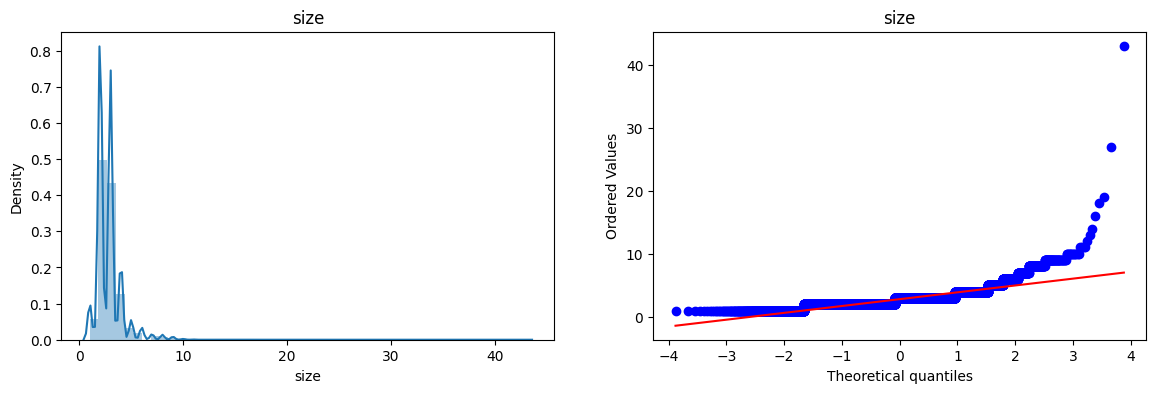

C:\Users\HP\AppData\Local\Temp\ipykernel_20156\2296454270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])


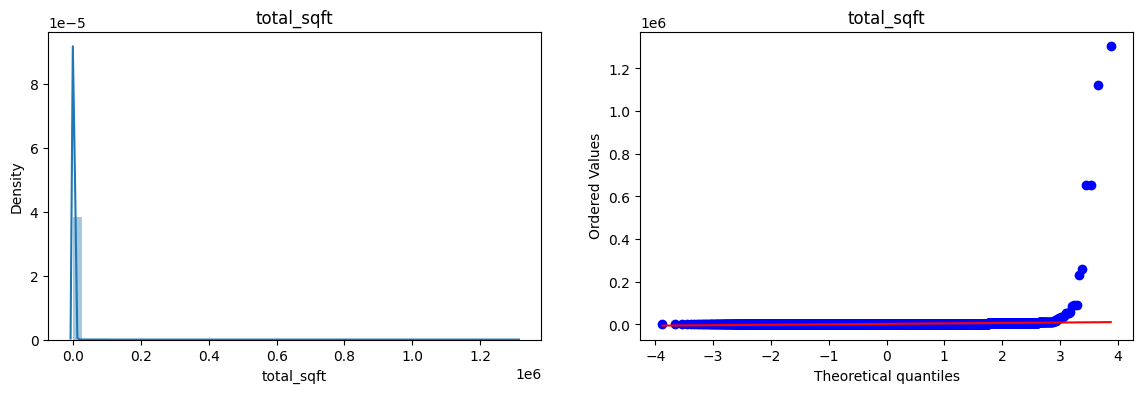

C:\Users\HP\AppData\Local\Temp\ipykernel_20156\2296454270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])


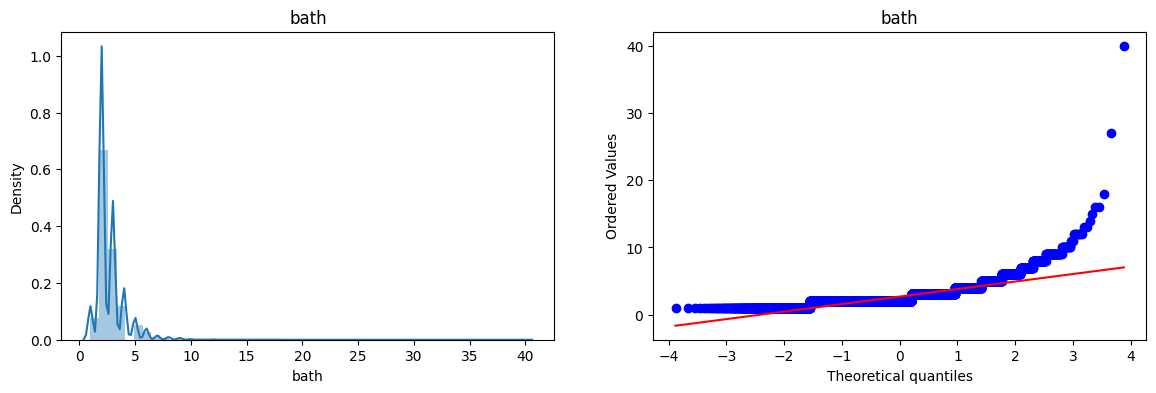

C:\Users\HP\AppData\Local\Temp\ipykernel_20156\2296454270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])


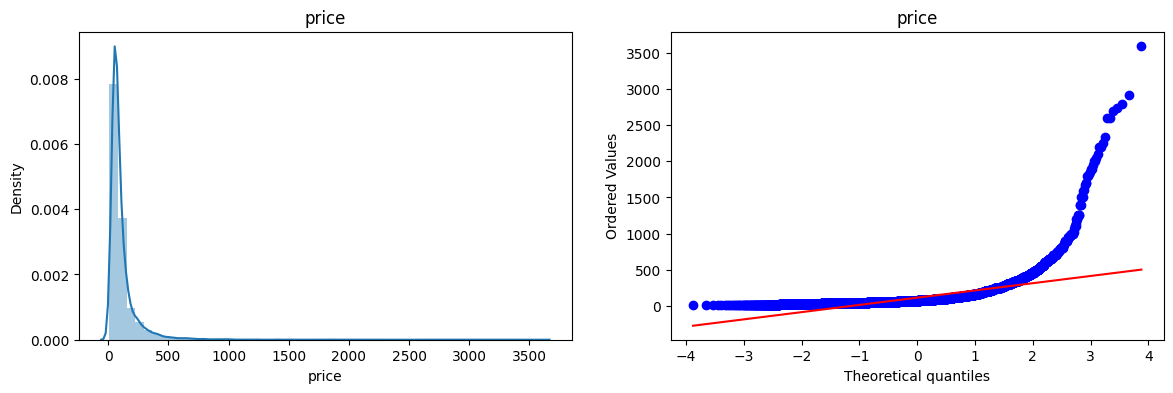

C:\Users\HP\AppData\Local\Temp\ipykernel_20156\2296454270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])


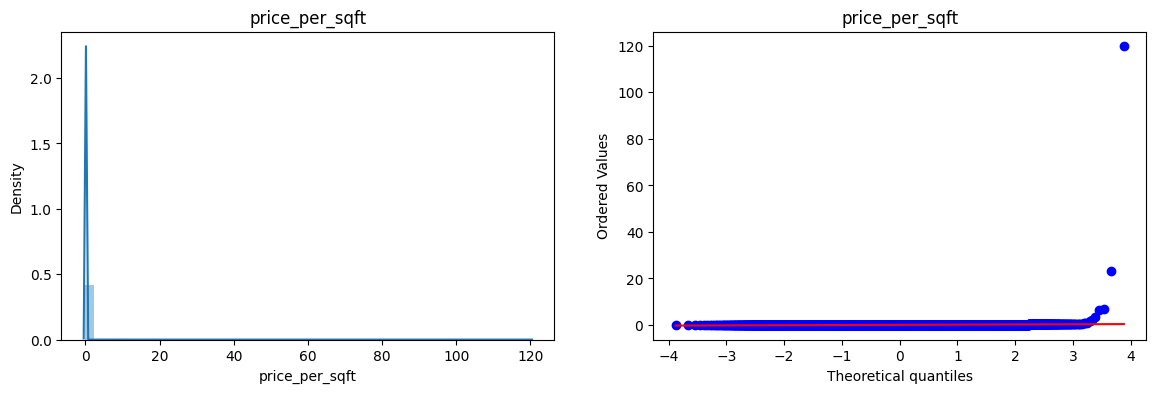

In [44]:
for feat in df.columns:
    if feat != 'location':
        plt.figure(figsize=(14,4))
        plt.subplot(121)
        sns.distplot(df[feat])
        plt.title(feat)

        plt.subplot(122)
        stats.probplot(df[feat],dist='norm',plot=plt)
        plt.title(feat)

        plt.show()
       

<AxesSubplot: xlabel='total_sqft', ylabel='price'>

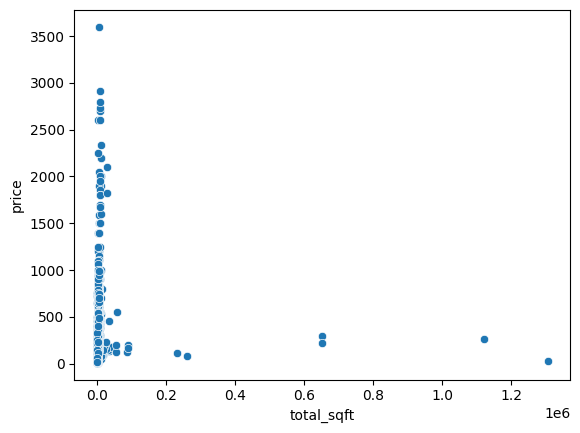

In [45]:
sns.scatterplot(x=df['total_sqft'],y=df['price'])

## Handling Outliers

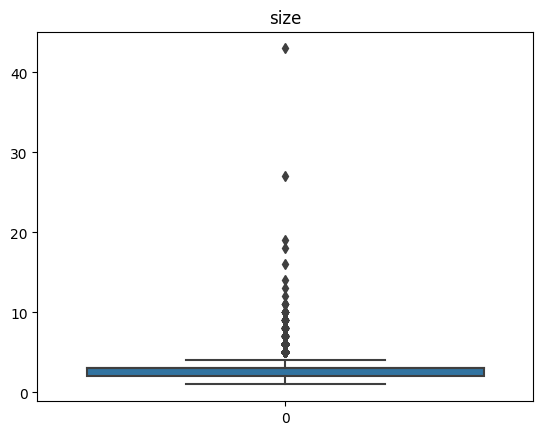

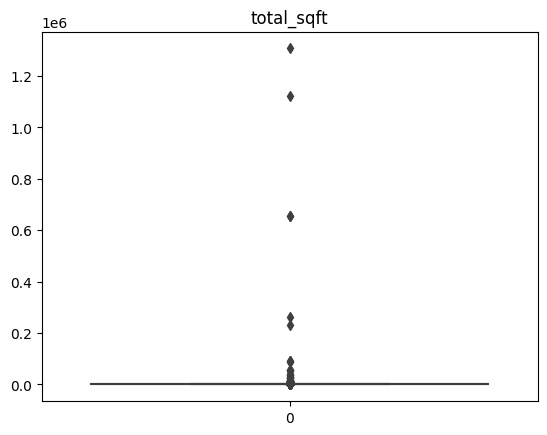

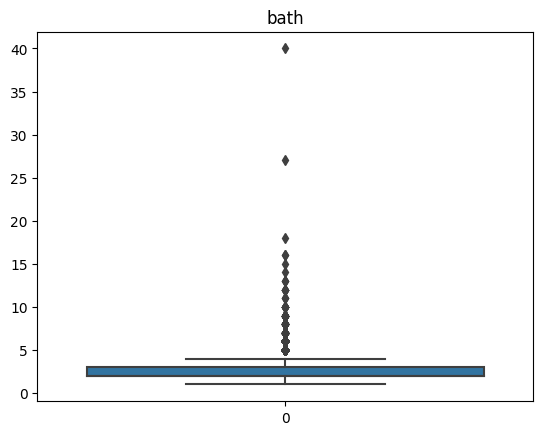

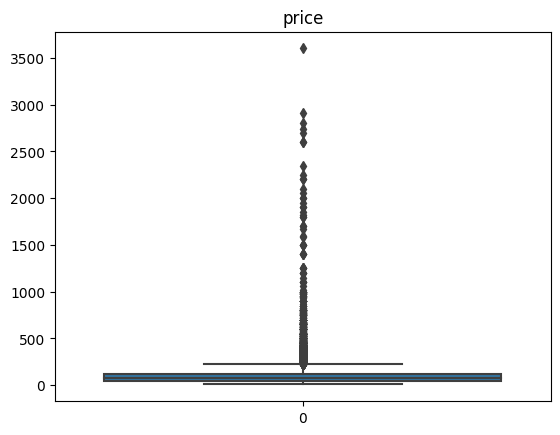

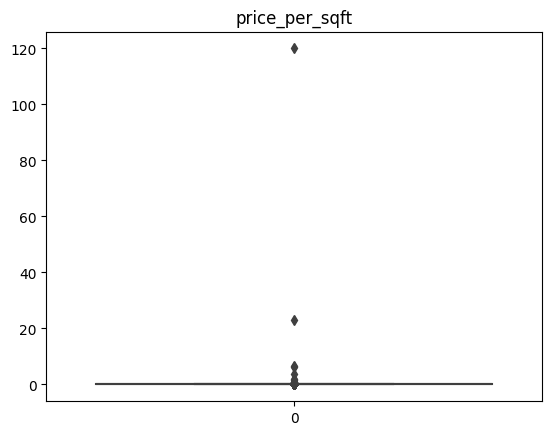

In [46]:
for feat in df.columns:
    if feat != 'location':
        sns.boxplot(df[feat])
        plt.title(feat)
        plt.show()

In [47]:
for feat in df.columns:
    if feat != 'location' and feat != 'price':
        q1 = df[feat].quantile(0.25)
        q3 = df[feat].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        df = df[df[feat] < ul]
        df = df[df[feat] >ll]

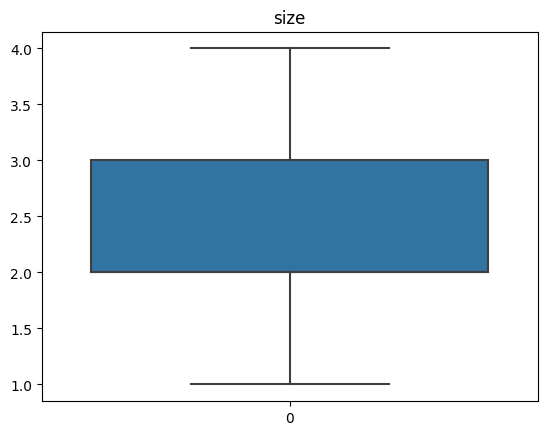

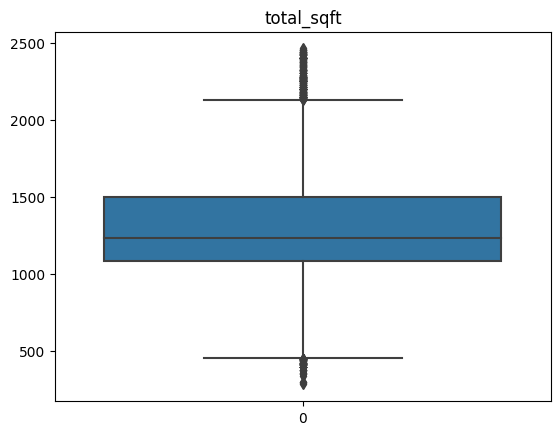

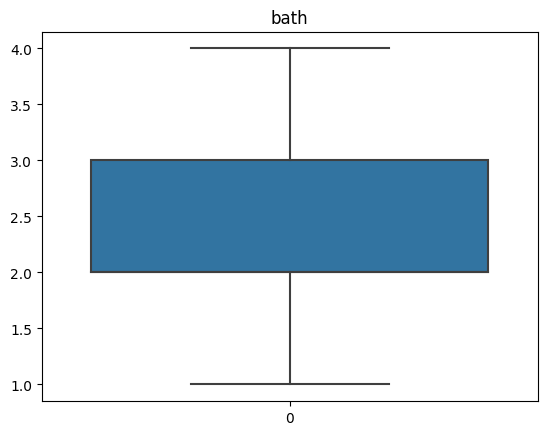

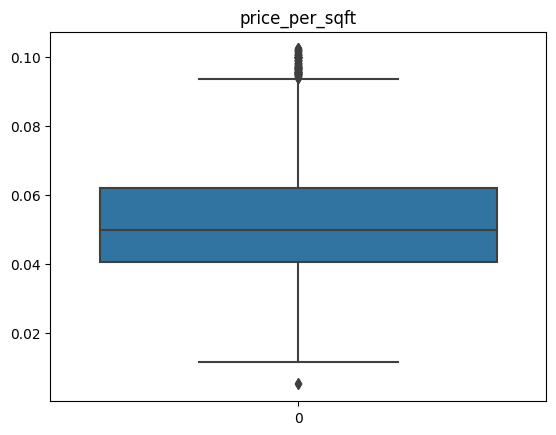

In [48]:
for feat in df.columns:
    if feat != 'location' and feat != 'price':
        sns.boxplot(df[feat])
        plt.title(feat)
        plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20156\2296454270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])


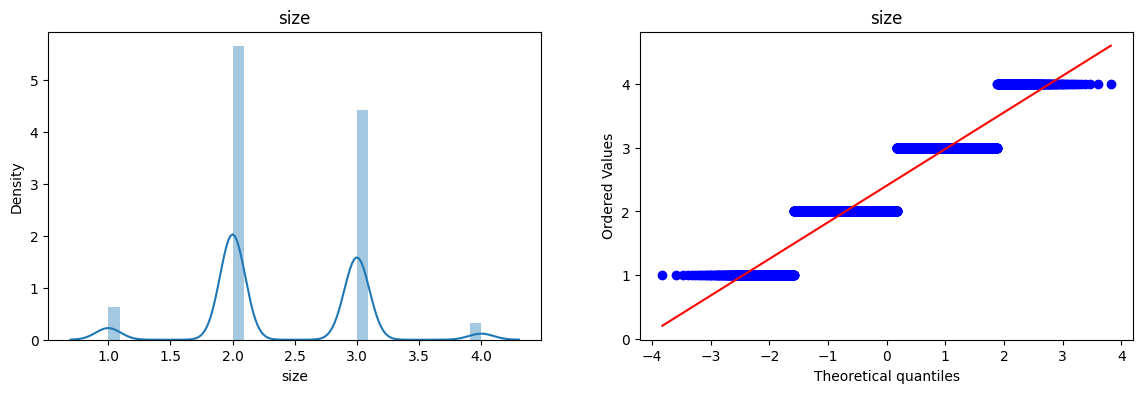

C:\Users\HP\AppData\Local\Temp\ipykernel_20156\2296454270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])


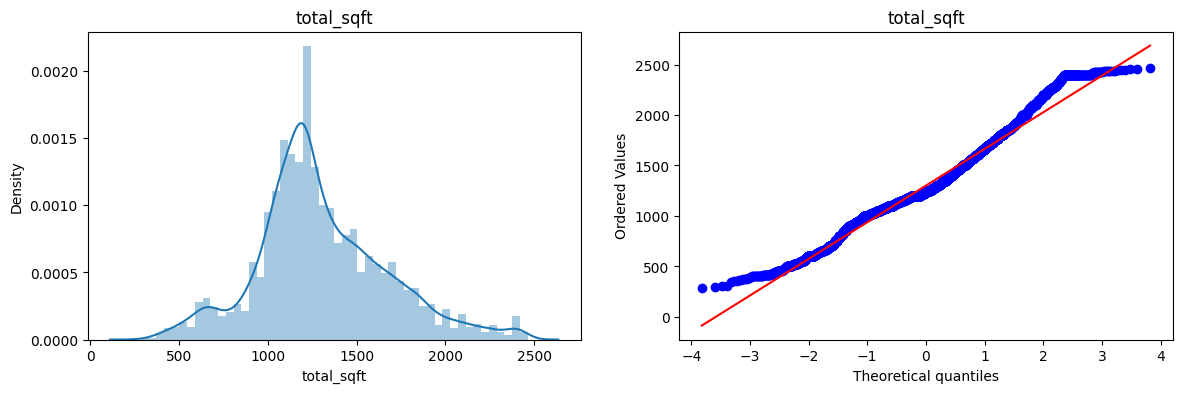

C:\Users\HP\AppData\Local\Temp\ipykernel_20156\2296454270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])


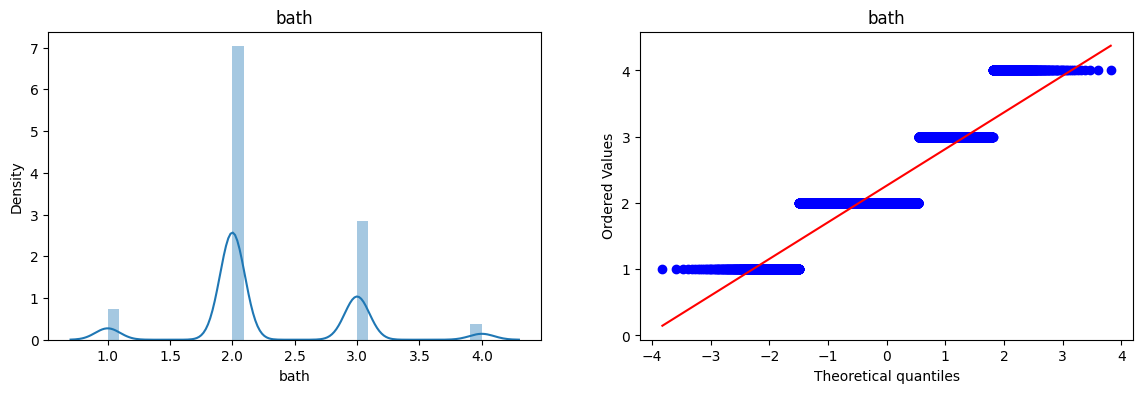

C:\Users\HP\AppData\Local\Temp\ipykernel_20156\2296454270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])


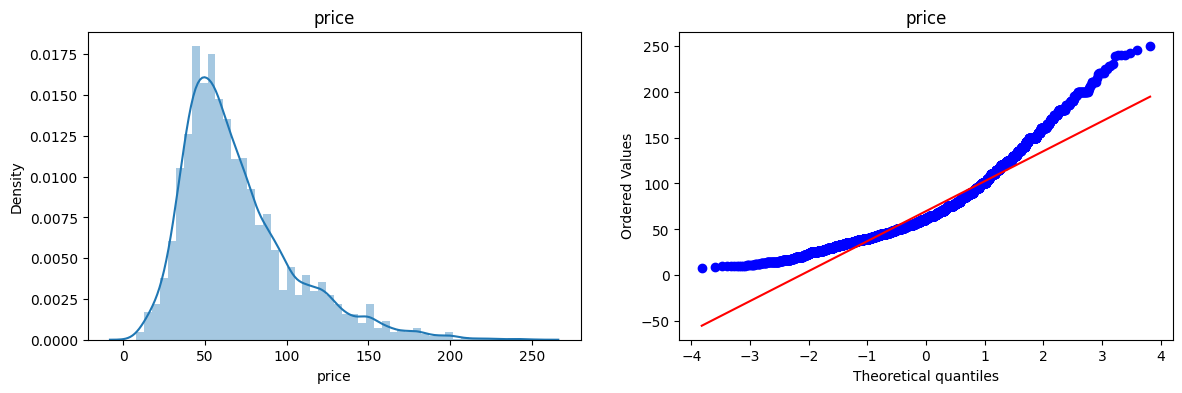

C:\Users\HP\AppData\Local\Temp\ipykernel_20156\2296454270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])


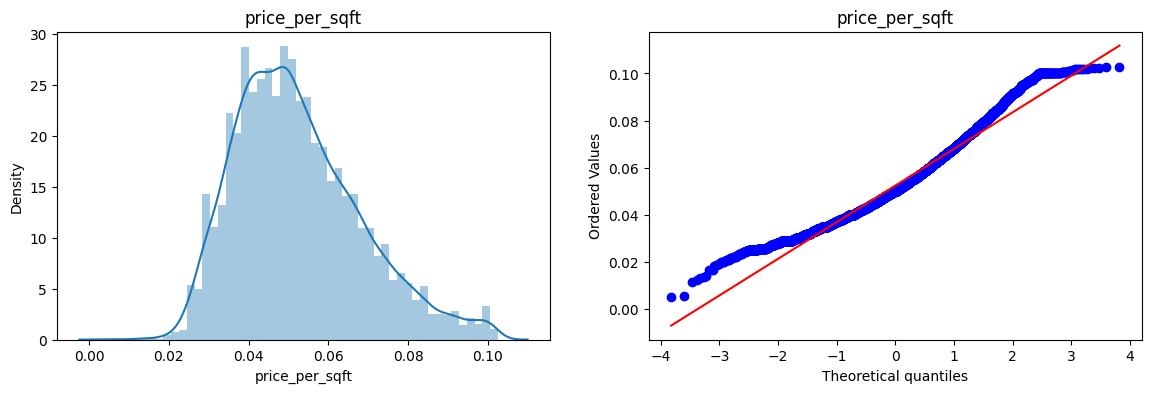

In [49]:
for feat in df.columns:
    if feat != 'location':
        plt.figure(figsize=(14,4))
        plt.subplot(121)
        sns.distplot(df[feat])
        plt.title(feat)

        plt.subplot(122)
        stats.probplot(df[feat],dist='norm',plot=plt)
        plt.title(feat)

        plt.show()
       

In [50]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'price_per_sqft'], dtype='object')

In [51]:
df2 = df.drop('location', axis = 1)

In [52]:
df2

,size,total_sqft,bath,price,price_per_sqft
0,2,1056.0,2.0,39.07,0.036998
2,3,1440.0,2.0,62.00,0.043056
3,3,1521.0,3.0,95.00,0.062459
4,2,1200.0,2.0,51.00,0.042500
5,2,1170.0,2.0,38.00,0.032479
...,...,...,...,...,...
13312,2,1262.0,2.0,47.00,0.037242
13313,3,1345.0,2.0,57.00,0.042379
13314,3,1715.0,3.0,112.00,0.065306
13317,2,1141.0,2.0,60.00,0.052585


## One Hot Encoding

In [53]:
dummies = pd.get_dummies(df.location,dtype='int')

In [54]:
df = pd.concat([df,dummies],axis=1)

In [55]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,2,1056.0,2.0,39.07,0.036998,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3,1440.0,2.0,62.00,0.043056,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3,1521.0,3.0,95.00,0.062459,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2,1200.0,2.0,51.00,0.042500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Whitefield,2,1170.0,2.0,38.00,0.032479,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [56]:
df.drop('location',axis=1,inplace=True)

## Checking whether Normal or not ?

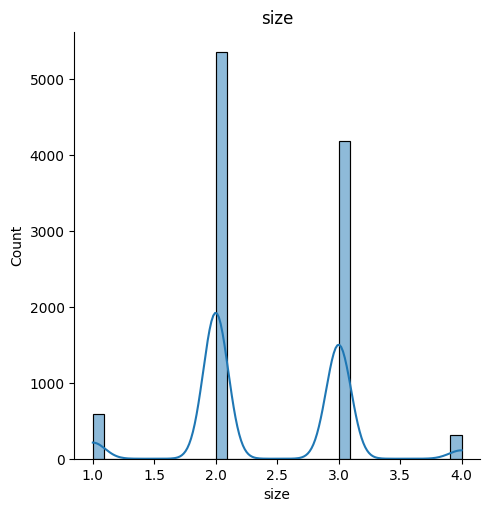

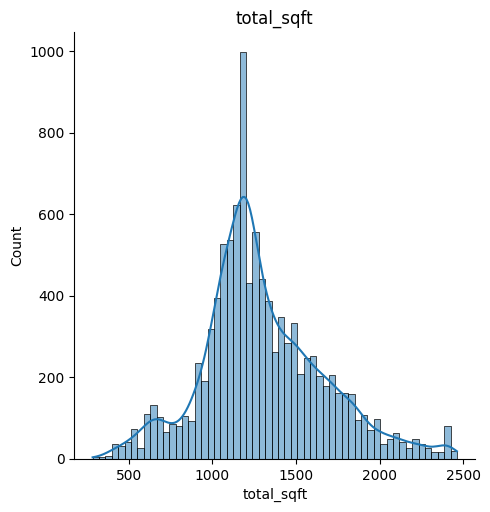

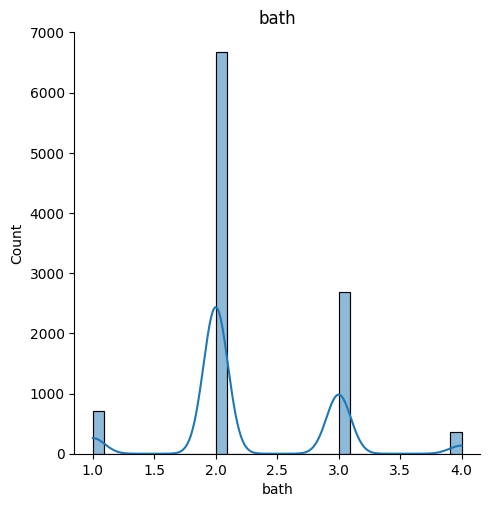

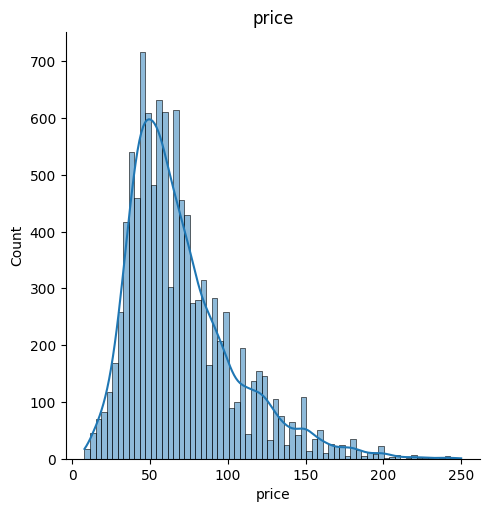

In [57]:
for feat in df.columns:
    if feat in ['size','total_sqft','bath','price']:
        sns.displot(df[feat],kde=True)
        plt.title(feat)
        plt.show()

<AxesSubplot: xlabel='total_sqft', ylabel='price'>

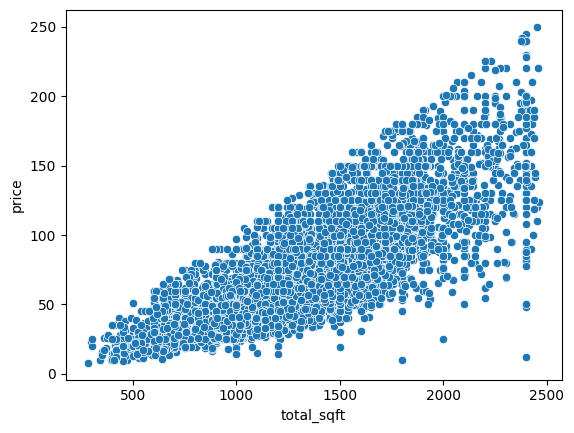

In [58]:
sns.scatterplot(x=df['total_sqft'],y=df['price'])

In [59]:
df = df[(df['price'] < 500) & (df['total_sqft'] >= 1000) ]

In [60]:
df.shape

(8898, 245)

<AxesSubplot: xlabel='total_sqft', ylabel='price'>

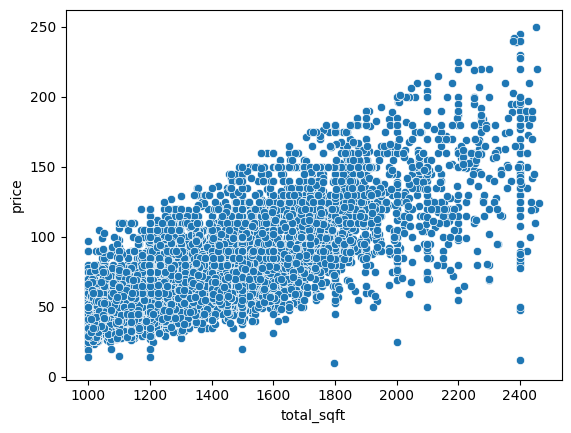

In [61]:
sns.scatterplot(x=df['total_sqft'],y=df['price'])

In [64]:
x = df.drop('price',axis=1)
y = df.iloc[:,3:4]

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [66]:
X_train

,size,total_sqft,bath,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
4122,2,1137.5,2.0,0.042993,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2908,3,1306.0,2.0,0.044410,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5128,3,1750.0,3.0,0.077714,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6143,3,1614.0,2.0,0.061958,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8292,3,1365.0,2.0,0.052747,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,3,1400.0,3.0,0.064286,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7792,3,1950.0,3.0,0.058974,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,3,1600.0,2.0,0.055000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1279,3,1565.0,3.0,0.056550,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [68]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)

print('MSE :',mean_squared_error(y_pred,y_test))

MSE : 26.948442114850277


In [69]:
y_pred

array([[ 48.49015269],
       [ 81.15302266],
       [ 53.75781634],
       ...,
       [ 41.29092298],
       [164.9646253 ],
       [ 70.97118195]])